In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
#EDA--
#data analysis-- shape, info(), describe(), dtypes, corr()
#missing value analysis
#outlier analysis
#visualization--

#supervised model building part-- classification model
#independt and depednt data
#divide the data into train and test set
#create your model
#train your model
#test your model-- predict()
#performance of the model-- accuracy score, confusion matrix, classification_report

In [51]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [52]:
df.shape

(303, 14)

In [53]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [57]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [58]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [59]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [60]:
df[df['chol']>300].shape

(43, 14)

In [61]:
df[(df['chol']>300) & (df['age']>40)].shape

(42, 14)

In [62]:
df[df['chol']>300].count()

age         43
sex         43
cp          43
trestbps    43
chol        43
fbs         43
restecg     43
thalach     43
exang       43
oldpeak     43
slope       43
ca          43
thal        43
target      43
dtype: int64

In [63]:
f=df[df['thal']==2]
f

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0


In [64]:
f[f['target']==1].shape

(130, 14)

In [65]:
df.shape

(303, 14)

In [66]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [67]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Text(0.5, 1.0, 'Age distribuition')

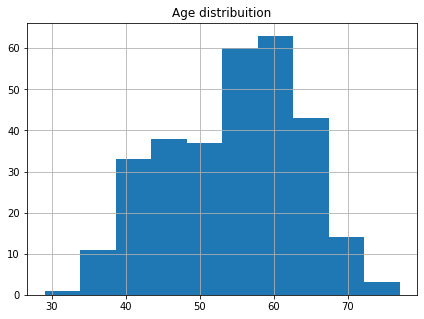

In [71]:
df['age'].hist(grid=True, bins=10) 
plt.title('Age distribuition')

In the above graph, we can analyse the distribution of Age column, and we can say that there are 60+ people who are having age between 57 to 63.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


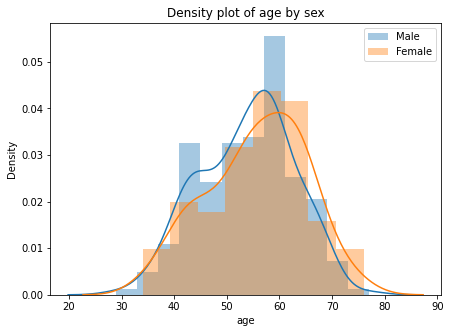

In [72]:
sns.distplot(df[df['sex']==1]['age'],  label='Male')
sns.distplot(df[df['sex']==0]['age'], label='Female')
plt.legend()
plt.title('Density plot of age by sex')
plt.show()

Density graph shows the smoothed distribution of points along the numerical axis. The density peaks where there is the highest concentration of points. In sum, density graphs can be considered smoothed histograms.

Text(0.5, 1.0, 'Resting Blood pressure distribuition')

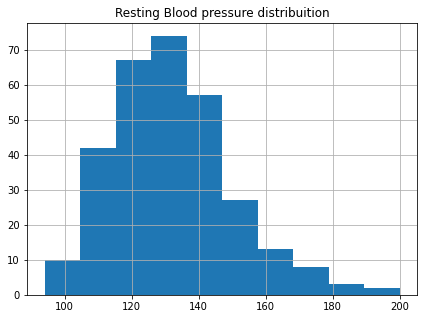

In [73]:
df['trestbps'].hist()
plt.title('Resting Blood pressure distribuition')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


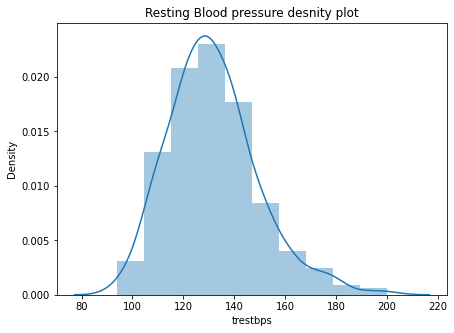

In [74]:
sns.distplot(df['trestbps'], bins=10)
plt.title('Resting Blood pressure desnity plot');

In the above graph, we are having a normal distribution 

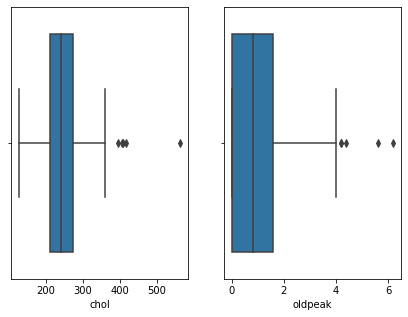

In [75]:
fig, axes = plt.subplots(nrows = 1, ncols=2)
sns.boxplot(x='chol', data=df, ax=axes[0])
sns.boxplot(x='oldpeak', data=df, ax=axes[1])

Text(0.5, 1.0, 'Count of target feature by sex')

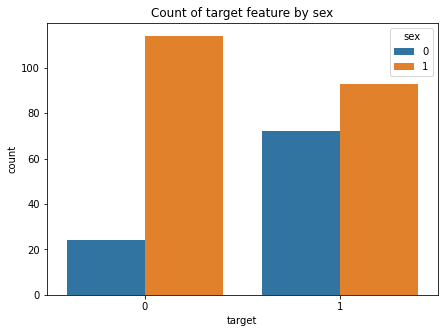

In [80]:
plt.rcParams['figure.figsize'] = (7,5)
sns.countplot(x='target', hue='sex', data=df);
plt.title('Count of target feature by sex')

The amount of healthy male people is greater than the amount of unhealthy. For women, the number of unhealthy women is higher.

In [81]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [83]:
pd.DataFrame(df['age'])

,age
0,63
1,37
2,41
3,56
4,57
...,...
298,57
299,45
300,68
301,57


In [85]:
X = df.iloc[:, :-1]
y = df['target']
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [89]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=30, test_size=0.3)
print(x_train.shape)
print(x_test.shape)

(212, 13)
(91, 13)


In [90]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [91]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [92]:
y_train

6      1
139    1
28     1
37     1
224    0
      ..
145    1
251    0
140    1
301    0
293    0
Name: target, Length: 212, dtype: int64

In [94]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3
122,41,0,2,112,268,0,0,172,1,0.0,2,0,2
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3
178,43,1,0,120,177,0,0,120,1,2.5,1,0,3
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2


In [95]:
clf = tree.DecisionTreeClassifier() #we are creating a decision tree model which is untrained
clf.fit(x_train,y_train)

#testing the model--
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [96]:
y_train_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [97]:
y_test_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1])

In [98]:
y_test

97     1
122    1
84     1
231    0
110    1
      ..
48     1
24     1
178    0
41     1
23     1
Name: target, Length: 91, dtype: int64

In [99]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 1.0
Test score 0.7142857142857143


In [100]:
accuracy_score(y_test_pred,y_test)

0.7142857142857143

In [101]:
# helper function
def plot_confusionmatrix(predict,actual,label):
    print(f'{label} Confusion matrix')
    cf = confusion_matrix(predict,actual)
    sns.heatmap(cf,annot=True,fmt='G' )
    plt.show()

Train Confusion matrix


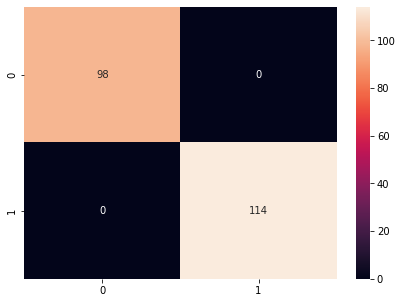

In [102]:
plot_confusionmatrix(y_train_pred,y_train,'Train')

Test Confusion matrix


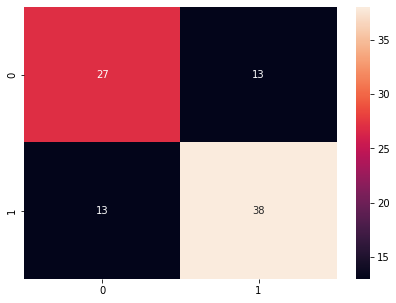

In [103]:
plot_confusionmatrix(y_test_pred,y_test,'Test')

In [104]:
confusion_matrix(y_test_pred,y_test)

array([[27, 13],
       [13, 38]])

In [108]:
c_parameter_name = 'max_depth'
c_parameter_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
df1 = pd.DataFrame(columns=['max_depth', 'accuracy'])
df1

,max_depth,accuracy


In [110]:
for input_parameter in c_parameter_values:
    model = tree.DecisionTreeClassifier(max_depth=input_parameter)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred)*100
    df1= df1.append({'max_depth' : input_parameter , 'accuracy' : acc_score}, ignore_index=True) 
df1

,max_depth,accuracy
0,1.0,79.120879
1,2.0,76.923077
2,3.0,74.725275
3,4.0,70.329670
4,5.0,75.824176
5,6.0,74.725275
6,7.0,74.725275
7,8.0,73.626374
8,9.0,75.824176
9,10.0,76.923077


In [111]:
model = tree.DecisionTreeClassifier(max_depth=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)*100

In [112]:
acc_score

79.12087912087912

In [113]:
from sklearn.metrics import classification_report

In [114]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76        39
           1       0.82      0.81      0.82        52

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91

